In [1]:
import scipy.io
import numpy as np
from IPython.display import Image
from PIL import Image 
import sys 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils.extmath import randomized_svd

In [58]:
newheight = 36
newwidth = 48

In [76]:
alldata = []

for samplenumber in range(11, 37):
    for imgnumber in range(1, 56):
        filepath = "Img//Sample" + '{0:03}'.format(samplenumber) + "//img" + '{0:03}'.format(samplenumber) + "-" + '{0:03}'.format(imgnumber) + ".png"
        im = Image.open(filepath) 
        imgsmall = im.resize((newwidth, newheight),Image.ANTIALIAS)
        
        tmp = []
        
        for h in range(0, imgsmall.size[1]): 
            #tmp = []
            for w in range(0, imgsmall.size[0]): 
                pixel = imgsmall.getpixel((w, h)) 
                tmp.append(1 - float(pixel[0]) / 255)
                    
            #img.append(tmp)

        
        alldata.append(np.array(tmp))
            

In [4]:
label = []


#for i in range(10):
#    label.append(55 * [str(i)])


ch = 'A'
for i in range(26):
    label.append(55 * [ch])
    ch = chr(ord(ch) + 1)

label = np.array(label).flatten()

In [78]:
alldata = np.array(alldata)

print len(alldata)
print len(label)
print len(alldata[0])

1430
1430
1728


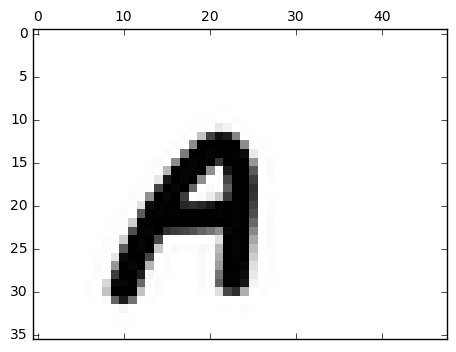

In [79]:
plt.gray() 
plt.rc('axes', grid=False)
_=plt.matshow(alldata[0].reshape(newheight, newwidth),cmap=plt.cm.gray_r)

plt.show()

In [80]:
n_comp = 40

pca = PCA(n_comp)
pca.fit(alldata)
alldata_pca = pca.transform(alldata)

x_train, x_test, y_train, y_test = train_test_split(alldata_pca, label, test_size=0.30, random_state=2)

norm = Normalizer().fit(x_train)           #规范化是将不同变化范围的值映射到相同的固定范围，常见的是[0,1]，此时也称为归一化
x_train = norm.transform(x_train)          #换后每个样本的各维特征的平方和为1
x_test = norm.transform(x_test)


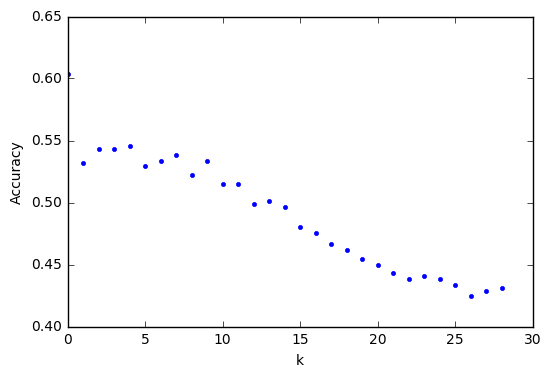

In [81]:
acc = []

for i in range(1, 30):
    neigh = KNeighborsClassifier(n_neighbors = i)
    neigh.fit(x_train, y_train)
    #neigh_predict = neigh.predict(x_test)
    acc.append(neigh.score(x_test, y_test))

plt.plot(acc,'.')
plt.xlabel('k')
_=plt.ylabel('Accuracy')
plt.show()

In [65]:
neigh_pred = neigh.predict(x_test)

for i in range(len(y_test)):
    print (y_test[i], neigh_pred[i] )

('T', 'I')
('K', 'I')
('M', 'M')
('V', 'V')
('K', 'K')
('C', 'C')
('N', 'N')
('Q', 'B')
('G', 'G')
('N', 'W')
('J', 'I')
('K', 'M')
('W', 'W')
('P', 'P')
('Y', 'P')
('Z', 'Z')
('I', 'I')
('V', 'V')
('O', 'O')
('L', 'C')
('B', 'B')
('W', 'W')
('N', 'N')
('U', 'U')
('P', 'P')
('Q', 'Q')
('C', 'C')
('N', 'M')
('R', 'R')
('W', 'L')
('L', 'L')
('L', 'L')
('M', 'M')
('V', 'Y')
('W', 'W')
('X', 'X')
('E', 'E')
('R', 'X')
('G', 'C')
('F', 'F')
('Q', 'Q')
('A', 'A')
('X', 'X')
('W', 'W')
('O', 'O')
('V', 'U')
('I', 'I')
('T', 'T')
('B', 'J')
('N', 'M')
('I', 'I')
('W', 'W')
('B', 'B')
('B', 'K')
('L', 'I')
('O', 'O')
('Q', 'Q')
('R', 'N')
('T', 'J')
('Z', 'Z')
('P', 'P')
('B', 'S')
('H', 'H')
('V', 'V')
('X', 'R')
('Y', 'Y')
('B', 'D')
('F', 'E')
('W', 'W')
('C', 'G')
('C', 'C')
('Q', 'Q')
('W', 'W')
('S', 'S')
('W', 'W')
('Y', 'Y')
('D', 'D')
('J', 'J')
('U', 'J')
('E', 'E')
('V', 'L')
('Q', 'Q')
('U', 'U')
('F', 'F')
('M', 'M')
('R', 'K')
('U', 'J')
('V', 'V')
('K', 'Z')
('S', 'L')
('V', 'U')

In [7]:
resizewidth = 120
resizeheight = 120

In [123]:
left = []
right = []
up = []
down = []
winterval = []
hinterval = []

for samplenumber in range(17, 37):
    for imgnumber in range(1, 56):
        filepath = "Img//Sample" + '{0:03}'.format(samplenumber) + "//img" + '{0:03}'.format(samplenumber) + "-" + '{0:03}'.format(imgnumber) + ".png"
        im = Image.open(filepath) 
        imgsmall = im.resize((resizewidth, resizeheight),Image.ANTIALIAS)
        
        img = []
           
        for h in range(0, imgsmall.size[1]):
            tmp = []
            for w in range(0, imgsmall.size[0]): 
                pixel = imgsmall.getpixel((w, h)) 
                tmp.append(1 - float(pixel[0]) / 255)
                    
            img.append(tmp)
     
        img = np.array(img)
        
        for h in range(resizeheight):
            if max(img[h, :]) > 0:
                up.append(h)
                tmpup = h
                break
        
        for h in range(resizeheight - 1, -1, -1):
            if max(img[h, :]) > 0:
                down.append(h)
                tmpdown = h
                break
            
        for w in range(resizewidth):
            if max(img[:, w]) > 0:
                left.append(w)
                tmpleft = w
                break
        
        for w in range(resizewidth - 1, -1, -1):
            if max(img[:, w]) > 0:
                right.append(w)
                tmpright = w
                break

        winterval.append(tmpright - tmpleft)
        hinterval.append(tmpdown - tmpup)
        
        box = (tmpleft, tmpup, tmpright, tmpdown)
        newIm = imgsmall.crop(box)
        newIm = newIm.resize((resizewidth, resizeheight),Image.ANTIALIAS)
        newIm.save("Img//Sample" + '{0:03}'.format(samplenumber) + "//img" + '{0:03}'.format(samplenumber) + "-" + '{0:03}'.format(imgnumber) +  "copy.png")
 
        
print left
print right
print up
print down
print winterval
print hinterval

[32, 33, 31, 26, 51, 35, 39, 38, 31, 31, 21, 31, 32, 20, 32, 33, 39, 32, 37, 29, 46, 21, 28, 39, 35, 31, 34, 32, 36, 34, 45, 38, 33, 37, 40, 40, 35, 31, 38, 35, 29, 28, 25, 36, 43, 43, 27, 35, 68, 35, 39, 30, 29, 29, 31, 34, 41, 35, 26, 43, 43, 46, 38, 31, 37, 27, 37, 38, 26, 32, 44, 44, 40, 39, 37, 51, 37, 38, 42, 27, 42, 40, 41, 39, 41, 46, 38, 40, 47, 42, 45, 48, 46, 45, 36, 33, 42, 34, 39, 47, 42, 37, 38, 70, 41, 31, 33, 26, 37, 25, 38, 48, 40, 25, 55, 48, 47, 39, 47, 44, 21, 34, 46, 40, 35, 41, 54, 42, 47, 35, 51, 41, 31, 53, 54, 51, 48, 42, 60, 44, 50, 50, 30, 47, 36, 50, 41, 52, 40, 47, 42, 25, 40, 43, 41, 46, 36, 44, 58, 49, 47, 46, 28, 45, 34, 35, 35, 45, 19, 42, 43, 48, 43, 27, 33, 21, 25, 32, 24, 33, 32, 39, 32, 37, 33, 45, 30, 28, 41, 34, 38, 40, 38, 35, 37, 43, 35, 38, 44, 42, 37, 31, 37, 42, 35, 22, 38, 40, 31, 37, 39, 36, 34, 63, 42, 37, 37, 31, 30, 30, 38, 42, 46, 25, 52, 51, 56, 42, 36, 41, 25, 39, 38, 33, 41, 45, 51, 44, 41, 41, 57, 38, 41, 44, 45, 41, 39, 45, 47, 48,

In [2]:
resizedata = []

for samplenumber in range(11, 37):
    for imgnumber in range(1, 56):
        filepath = "Img//Sample" + '{0:03}'.format(samplenumber) + "//img" + '{0:03}'.format(samplenumber) + "-" + '{0:03}'.format(imgnumber) + "copy.png"
        im = Image.open(filepath) 
        #imgsmall = im.resize((newwidth, newheight),Image.ANTIALIAS)
        
        tmp = []
        
        for h in range(0, im.size[1]): 
            #tmp = []
            for w in range(0, im.size[0]): 
                pixel = im.getpixel((w, h)) 
                tmp.append(1 - float(pixel[0]) / 255)
                    
            #img.append(tmp)

        
        resizedata.append(np.array(tmp))

In [5]:
resizedata = np.array(resizedata)
print resizedata.shape
print len(label)

(1430, 14400)
1430


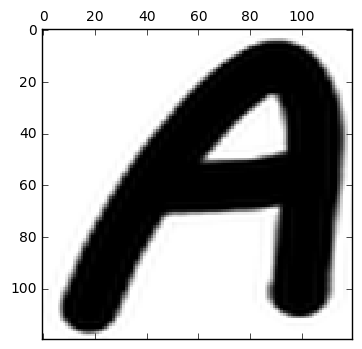

In [8]:
plt.gray() 
plt.rc('axes', grid=False)
_=plt.matshow(resizedata[0].reshape(resizeheight, resizewidth),cmap=plt.cm.gray_r)

plt.show()

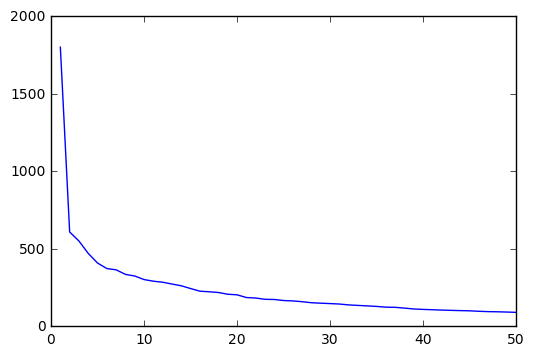

In [9]:
U, Sigma, VT = randomized_svd(resizedata, n_components=50,n_iter=5,random_state=None)
plt.xlim([0,50])
plt.plot(range(1,len(Sigma)+1),Sigma)

In [14]:
# cross validation

n_comp_new = 40

pca_new = PCA(n_comp_new)
pca_new.fit(resizedata)
resizedata_pca = pca_new.transform(resizedata)


def cross(j):
    accuracy = 0
    for i in range(5):
        x_train_resize, x_test_resize, y_train_resize, y_test_resize = train_test_split(resizedata_pca, label, test_size=0.30, random_state=1)

        norm = Normalizer().fit(x_train_resize)           
        x_train_resize = norm.transform(x_train_resize)          
        x_test_resize = norm.transform(x_test_resize)

        neigh = KNeighborsClassifier(n_neighbors = j)
        neigh.fit(x_train_resize, y_train_resize)
        #neigh_predict = neigh.predict(x_test)
        accuracy += neigh.score(x_test_resize, y_test_resize)
    
    return accuracy / float(5)

In [141]:
n_comp_new = 40

pca_new = PCA(n_comp_new)
pca_new.fit(resizedata)
resizedata_pca = pca_new.transform(resizedata)

x_train_resize, x_test_resize, y_train_resize, y_test_resize = train_test_split(resizedata_pca, label, test_size=0.30, random_state=2)

norm = Normalizer().fit(x_train_resize)           
x_train_resize = norm.transform(x_train_resize)          
x_test_resize = norm.transform(x_test_resize)

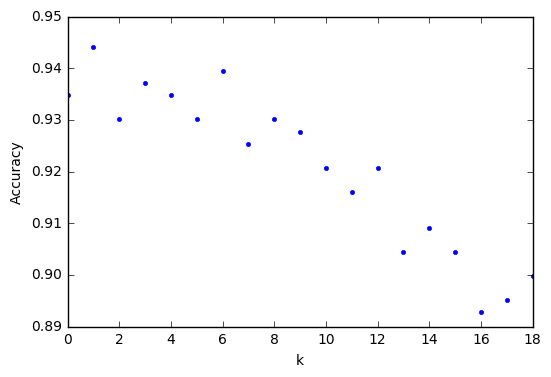

In [15]:
acc = []

for i in range(1, 20):
    acc.append(cross(i))

plt.plot(acc,'.')
plt.xlabel('k')
_=plt.ylabel('Accuracy')
plt.show()

In [143]:
print max(acc)

0.946386946387


In [145]:
neigh = KNeighborsClassifier(n_neighbors = 3)
neigh.fit(x_train_resize, y_train_resize)
neigh_predict = neigh.predict(x_test_resize)
print neigh.score(x_test_resize, y_test_resize)

for i in range(len(y_test_resize)):
    print (neigh_predict[i], y_test_resize[i])

0.937062937063
('T', 'T')
('K', 'K')
('M', 'M')
('V', 'V')
('K', 'K')
('C', 'C')
('N', 'N')
('Q', 'Q')
('G', 'G')
('N', 'N')
('J', 'J')
('K', 'K')
('W', 'W')
('P', 'P')
('Y', 'Y')
('Z', 'Z')
('I', 'I')
('V', 'V')
('O', 'O')
('L', 'L')
('B', 'B')
('W', 'W')
('N', 'N')
('U', 'U')
('P', 'P')
('Q', 'Q')
('C', 'C')
('N', 'N')
('R', 'R')
('W', 'W')
('L', 'L')
('L', 'L')
('M', 'M')
('V', 'V')
('W', 'W')
('X', 'X')
('E', 'E')
('R', 'R')
('G', 'G')
('F', 'F')
('Q', 'Q')
('A', 'A')
('X', 'X')
('W', 'W')
('O', 'O')
('V', 'V')
('I', 'I')
('T', 'T')
('I', 'B')
('N', 'N')
('I', 'I')
('W', 'W')
('B', 'B')
('B', 'B')
('L', 'L')
('O', 'O')
('Q', 'Q')
('R', 'R')
('K', 'T')
('Z', 'Z')
('P', 'P')
('B', 'B')
('H', 'H')
('V', 'V')
('X', 'X')
('Y', 'Y')
('B', 'B')
('F', 'F')
('W', 'W')
('C', 'C')
('C', 'C')
('Q', 'Q')
('W', 'W')
('S', 'S')
('W', 'W')
('Y', 'Y')
('D', 'D')
('J', 'J')
('U', 'U')
('E', 'E')
('V', 'V')
('Q', 'Q')
('U', 'U')
('F', 'F')
('M', 'M')
('R', 'R')
('U', 'U')
('V', 'V')
('K', 'K')
('S', 